In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import pandas as pd
import time
from NEF_rec import *
from fit import *
from plot_spikes import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

### Carrabin

In [2]:
trial = 2
sid = 1
alpha = 0.2
lambd = 0.0
z = 0
n_neurons = 500
dataset = 'carrabin'

empirical = pd.read_pickle(f"data/{dataset}.pkl").query("sid==@sid")
trials = empirical['trial'].unique() 
W = np.zeros((1, n_neurons))
for t in trials[:20]:
    print(f"training sid {sid}, trial {t}")
    env = EnvironmentRec(dataset, sid=sid, trial=t, iti_noise=0)
    net, sim, W = simulate_NEF_rec(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, z=z, seed_net=sid, train=True)
print(f"running sid {sid}, trial {trial}")
env = EnvironmentRec(dataset, sid=sid, trial=trial, iti_noise=0)
net, sim = simulate_NEF_rec(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, z=z, seed_net=sid, train=False)

training sid 1, trial 1
training sid 1, trial 2
training sid 1, trial 3
training sid 1, trial 4
training sid 1, trial 5
training sid 1, trial 6
training sid 1, trial 7
training sid 1, trial 8
training sid 1, trial 9
training sid 1, trial 10
training sid 1, trial 11
training sid 1, trial 12
training sid 1, trial 13
training sid 1, trial 14
training sid 1, trial 15
training sid 1, trial 16
training sid 1, trial 17
training sid 1, trial 18
training sid 1, trial 19
training sid 1, trial 20
running sid 1, trial 2


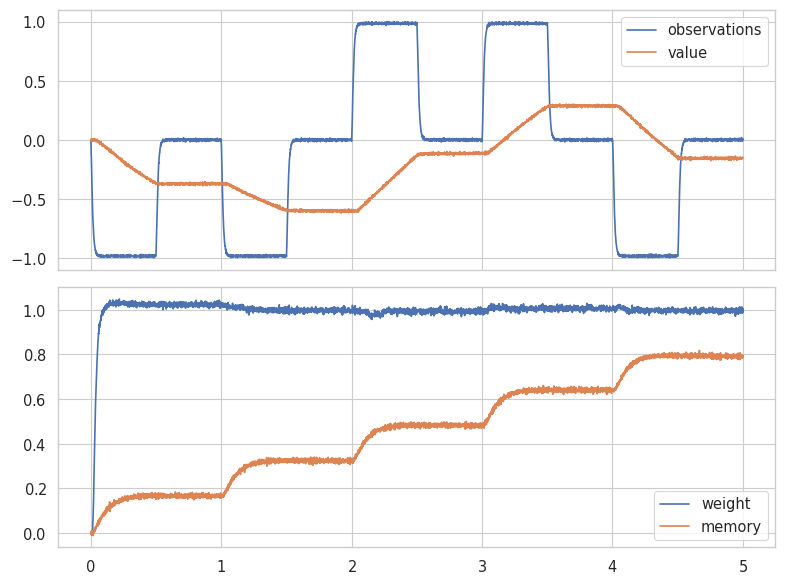

In [3]:
times = sim.trange().flatten()
stim = sim.data[net.probe_stim].flatten()
weight = sim.data[net.probe_weight].flatten()
memory = sim.data[net.probe_memory].flatten()
error = sim.data[net.probe_error_value].flatten()
value = sim.data[net.probe_value].flatten()
# obs_times = np.arange(0, 6*env.T, env.T)

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True)
    sns.lineplot(x=times, y=stim, ax=axes[0], label='observations')
    sns.lineplot(x=times, y=value, ax=axes[0], label='value')
    # sns.lineplot(x=times, y=error, ax=axes[0], label='error')
    # sns.lineplot(x=obs_times, y=B_0, ax=axes[0], label='Bayes_0')
    # sns.lineplot(x=obs_times, y=RL_0, ax=axes[0], label='RL_0')
    sns.lineplot(x=times, y=weight, ax=axes[1], label='weight')
    sns.lineplot(x=times, y=memory, ax=axes[1], label='memory')
    # axes[0].set(xlabel='time', ylabel='value')
    # axes[1].set(xlabel='time', ylabel='weight', xticks=obs_times)
    plt.tight_layout()

In [4]:
print(env.obs_times)
print(value[env.obs_times])

[500, 1500, 2500, 3500, 4500]
[-0.36593576 -0.59174532 -0.12971106  0.27874628 -0.13336555]


In [ ]:
times = sim.trange().flatten()
input_obs = sim.data[net.probe_input_obs].flatten()
obs = sim.data[net.probe_obs].flatten()
weight = sim.data[net.probe_weight].flatten()
error = sim.data[net.probe_error].flatten()
value = sim.data[net.probe_value].flatten()
context = sim.data[net.probe_context]
obs_times = np.arange(0, 6*env.T, env.T)

obs_spikes = sim.data[net.probe_obs_spikes]
weight_spikes = sim.data[net.probe_weight_spikes]
error_spikes = np.hstack([sim.data[net.probe_error1_spikes], sim.data[net.probe_error2_spikes]])
value_spikes = sim.data[net.probe_value_spikes]
context_spikes = sim.data[net.probe_context_spikes]
times2, obs_spikes2 = preprocess_spikes(times, obs_spikes, num=100, sample_size=100)
times2, weight_spikes2 = preprocess_spikes(times, weight_spikes, num=100, sample_size=100)
times2, error_spikes2 = preprocess_spikes(times, error_spikes, num=100, sample_size=100)
times2, value_spikes2 = preprocess_spikes(times, value_spikes, num=100, sample_size=100)
times2, context_spikes2 = preprocess_spikes(times, context_spikes, num=100, sample_size=100)

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(9,4), sharex=True, sharey='row')
    sns.lineplot(x=times, y=obs, ax=axes[0][0], color=palette[1])
    sns.lineplot(x=times, y=error, ax=axes[0][1], color=palette[2])
    sns.lineplot(x=times, y=weight, ax=axes[0][2], color=palette[4])
    for d in range(context.shape[1]):
        sns.lineplot(x=times, y=context[:,d], ax=axes[0][3], color=palette[d], alpha=0.5)
    sns.lineplot(x=times, y=value, ax=axes[0][4], color=palette[0])
    # sns.lineplot(x=obs_times, y=B_0, ax=axes[0][3], label='Bayes_0')
    sns.lineplot(x=obs_times, y=RL_0, ax=axes[0][4], color=palette[3])
    axes[0][0].set(title='observation', xlim=[0,5], ylim=[-1,1], xticks=range(6), ylabel='Decoded Estimate')
    axes[0][1].set(title='error')
    axes[0][2].set(title='weight')
    axes[0][3].set(title='context')
    axes[0][4].set(title='value')
with sns.axes_style("white"):
    # plot_spikes(times, obs_spikes, ax=axes[1][0])
    # plot_spikes(times, error_spikes, ax=axes[1][1])
    # plot_spikes(times, weight_spikes, ax=axes[1][2])
    # plot_spikes(times, value_spikes, ax=axes[1][3])
    plot_spikes(times2, obs_spikes2, ax=axes[1][0])
    plot_spikes(times2, error_spikes2, ax=axes[1][1])
    plot_spikes(times2, weight_spikes2, ax=axes[1][2])
    plot_spikes(times2, context_spikes2, ax=axes[1][3])
    plot_spikes(times2, value_spikes2, ax=axes[1][4])
    axes[1][0].grid(False)
    axes[1][1].grid(False)
    axes[1][2].grid(False)
    axes[1][3].grid(False)
    axes[1][4].grid(False)
    axes[1][0].set(ylabel='Neuron')
# axes[1].set(xlabel='time', ylabel='weight', xticks=obs_times)
plt.tight_layout()
fig.savefig("plots/dynamics_NEF_RL_demo.jpg", dpi=200)

### Jiang

In [5]:
trial = 1
sid = 1
z = 0.5
alpha = 0.2
lambd = 0
n_neurons = 1000
dataset = 'jiang'

empirical = pd.read_pickle(f"data/{dataset}.pkl").query("sid==@sid")
trials = empirical['trial'].unique() 
W = np.zeros((1, n_neurons))
for t in trials[:20]:
    print(f"training sid {sid}, trial {t}")
    env = EnvironmentRec(dataset, sid=sid, trial=t, iti_noise=0)
    net, sim, W = simulate_NEF_rec(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, z=z, seed_net=sid, train=True)
print(f"running sid {sid}, trial {trial}")
env = EnvironmentRec(dataset, sid=sid, trial=trial, iti_noise=0)
net, sim = simulate_NEF_rec(W, env, alpha=alpha, n_neurons=n_neurons, lambd=lambd, z=z, seed_net=sid, train=False)

training sid 1, trial 1
training sid 1, trial 2
training sid 1, trial 3
training sid 1, trial 4
training sid 1, trial 5
training sid 1, trial 6
training sid 1, trial 7
training sid 1, trial 8
training sid 1, trial 9
training sid 1, trial 10
training sid 1, trial 11
training sid 1, trial 12
training sid 1, trial 13
training sid 1, trial 14
training sid 1, trial 15
training sid 1, trial 16
training sid 1, trial 17
training sid 1, trial 18
training sid 1, trial 19
training sid 1, trial 20
running sid 1, trial 1


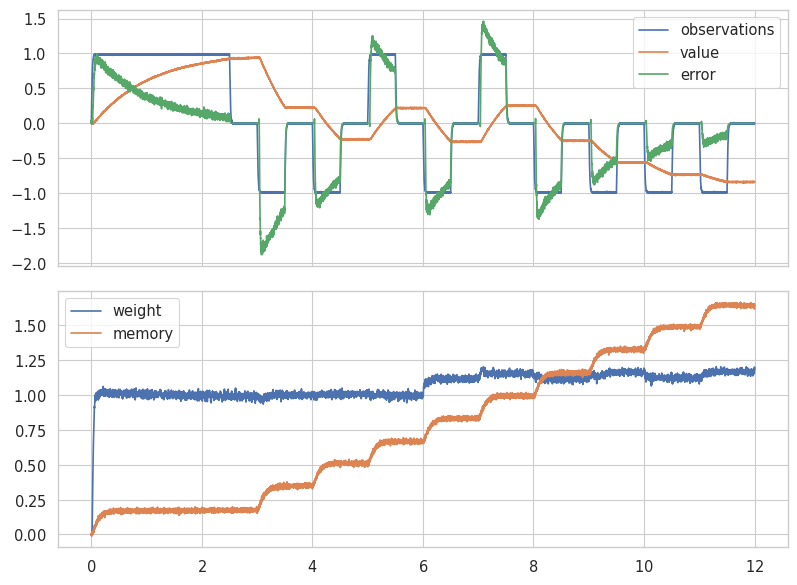

In [6]:
times = sim.trange().flatten()
stim = sim.data[net.probe_stim].flatten()
weight = sim.data[net.probe_weight].flatten()
memory = sim.data[net.probe_memory].flatten()
error = sim.data[net.probe_error_value].flatten()
value = sim.data[net.probe_value].flatten()
# obs_times = np.arange(0, 6*env.T, env.T)

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True)
    sns.lineplot(x=times, y=stim, ax=axes[0], label='observations')
    sns.lineplot(x=times, y=value, ax=axes[0], label='value')
    sns.lineplot(x=times, y=error, ax=axes[0], label='error')
    # sns.lineplot(x=obs_times, y=B_0, ax=axes[0], label='Bayes_0')
    # sns.lineplot(x=obs_times, y=RL_0, ax=axes[0], label='RL_0')
    sns.lineplot(x=times, y=weight, ax=axes[1], label='weight')
    sns.lineplot(x=times, y=memory, ax=axes[1], label='memory')
    # axes[0].set(xlabel='time', ylabel='value')
    # axes[1].set(xlabel='time', ylabel='weight', xticks=obs_times)
    plt.tight_layout()

In [7]:
print(env.obs_times)
print(value[env.obs_times])
# print(env.empirical)

[2500, 5500, 8500, 11500]
[ 0.92313935  0.21081622 -0.24157837 -0.82962199]


In [ ]:
times = sim.trange().flatten()
input_obs = sim.data[net.probe_input_obs].flatten()
obs = sim.data[net.probe_obs].flatten()
weight = sim.data[net.probe_weight].flatten()
error = sim.data[net.probe_error].flatten()
value = sim.data[net.probe_value].flatten()
obs_times = np.arange(3*env.T, env.T+4*env.n_neighbors*env.T, env.T)
obs_times = list(obs_times)
obs_times.insert(0, 0)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True)
sns.lineplot(x=times, y=obs, ax=axes[0], label='observations')
sns.lineplot(x=times, y=value, ax=axes[0], label='value')
sns.lineplot(x=times, y=error, ax=axes[0], label='error')
sns.lineplot(x=obs_times, y=RLz, ax=axes[0], label='RLz')
sns.lineplot(x=obs_times, y=DGz, ax=axes[0], label='DGz')
sns.lineplot(x=times, y=weight, ax=axes[1], label='weight')
axes[1].axhline(0, color='k', lw=0.1)
axes[1].axvline(3*env.T, color='k', ls='--')
axes[1].axvline(3*env.T+env.n_neighbors*env.T, color='k', ls='--')
axes[1].axvline(3*env.T+2*env.n_neighbors*env.T, color='k', ls='--')
axes[1].axvline(3*env.T+3*env.n_neighbors*env.T, color='k', ls='--')
axes[0].set(xlabel='time', ylabel='value')
axes[1].set(xlabel='time', ylabel='value', xticks=np.arange(0, env.T+4*env.n_neighbors*env.T, env.T))  # , ylim=(0.0, 0.5)
plt.tight_layout()